# Stochastic differential equations

This code simulate some Ito SDE's given by

$$dX_t = \mu(t,X_t,W_t) dt + \sigma(t,X_t,W_t)dW_t$$

using Euler–Maruyama method 

$$X_{t+\Delta t} = X_{t}+\mu(t,X_t,W_t)\Delta t + \sigma(t,X_t,W_t)\sqrt{\Delta t}Z$$

wher $Z \sim \mathcal{N}(0,1)$ is a gaussian variable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 

In [2]:
class SDEsolver:

    def __init__(self, mu, sigma, x0, dt=0.01, t0=0):
        """
        Initialize the SDE solver using Euler-Maruyama scheme
        
        Parameters:
        - mu: function, the drift term mu=mu(t,X_t,W_t)
        - sigma: function, the diffusion term sigma=sigma(t,X_t,W_t)
        - x0: float, initial starting point
        - t0: float, initial time
        - dt: float, time step
        """
        self.mu=mu
        self.sigma=sigma
        self.x0 = x0
        self.t0 = t0
        self.dt = dt

    def solve(self, t, N):
        """
        Initialize the SDE solver using Euler-Maruyama scheme
        
        Parameters:
        - t: float, total time
        - N: int, number of trajectories
        """
        n_steps = int((t-self.t0)/self.dt)
        t = np.linspace(self.t0,t,n_steps+1)

        x = np.zeros((N+1,n_steps+1))
        x[:,0] = self.x0
        for i in range(1,N+1):
            for j in range(1, n_steps+1):
                t_c = t[j-1] # current time
                x_c = x[i,j-1] # current position

                drift = self.mu(t_c,x_c, random.gauss(0,1)*np.sqrt(self.dt))*self.dt
                noise = random.gauss(0,1)*np.sqrt(self.dt)*self.sigma(t_c,x_c, random.gauss(0,1)*np.sqrt(self.dt))

                x[i,j] = x[i,j-1]+ drift + noise
                
        return t,x




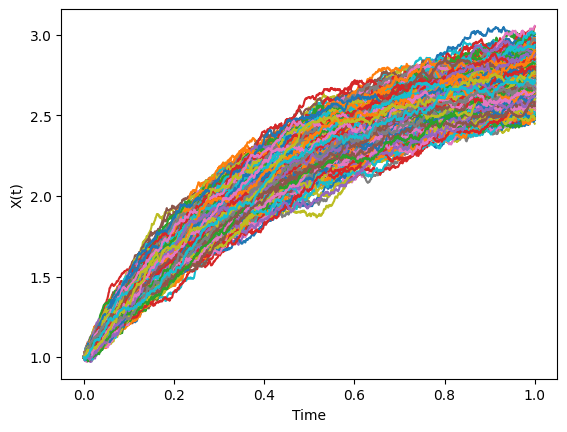

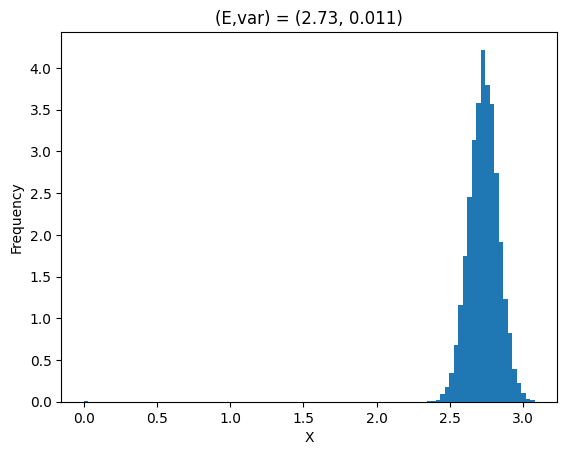

In [3]:
if __name__ == "__main__":
    # Define the parameters
    r = 2  # growth rate
    sigma = 0.2  # volatility
    x0 = 1  # initial condition
    N = 10**(4) # number of trajectories
    T = 1 # total time
    b = 3 # Long time

    # Define the drift and diffusion functions (Vasicek model)
    def mu(t,x,w):
        return r*(b-x)

    def sigma_func(t,x,w):
        return sigma

    # Create N trajectories
    solver = SDEsolver(mu=mu, sigma=sigma_func, x0=x0, dt=0.001)
    times, values = solver.solve(T, N)
    for i in range(1,N+1,10):
        plt.plot(times, values[i])
        plt.xlabel("Time")
        plt.ylabel("X(t)")
    
    # Histogram of the distribution of trajectories at time T

    plt.figure()
    
    final_val = values[:,-1]

    plt.hist(final_val, bins = int(np.sqrt(N)), density=True)
    plt.xlabel("X")
    plt.ylabel("Frequency")
    E = sum(values[:,-1])*1/(len(values[:,-1]))
    var = sum((values[:,-1])**2)*1/(len(values[:,-1])-1) -E**2
    plt.title("(E,var) = ({}, {})".format(round(E,3), round(var,3)))
    plt.show()
